# Import Needed Modules

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data In

## Use Pandas read_csv to bring in the local CSV

In [15]:
book_data = pd.read_csv("assets/best_book_21st.csv")

## Use columns function to see what columns are included in the data and to see the exact spelling of the column.

In [16]:
book_data.columns

Index(['id', 'title', 'series', 'author', 'book_link', 'genre',
       'date_published', 'publisher', 'num_of_page', 'lang', 'review_count',
       'rating_count', 'rate', 'award'],
      dtype='object')

# Manipulate and Clean Data

## Start by dropping unneeded columns using the drop() function

## Then use the info() function to gather information and see what else is needed to clean the data

In [17]:
alt_book_data = book_data.drop(columns=['id', 'series', 'book_link', 'publisher', 'lang', 'award'])

alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           10018 non-null  object 
 1   author          10003 non-null  object 
 2   genre           9019 non-null   object 
 3   date_published  9970 non-null   object 
 4   num_of_page     9737 non-null   float64
 5   review_count    10003 non-null  object 
 6   rating_count    10003 non-null  object 
 7   rate            10003 non-null  float64
dtypes: float64(2), object(6)
memory usage: 626.2+ KB


## Use value_counts() function to find duplicate titles

In [18]:
alt_book_data['title'].value_counts()

Bloodlines (Bloodlines, #1)                                              4
The Shack                                                                3
The God Delusion                                                         3
Prey                                                                     3
Dominion                                                                 3
                                                                        ..
Shakespeare Saved My Life                                                1
The Power (The Secret, #2)                                               1
Henna House                                                              1
I Remember Running: The Year I Got Everything I Ever Wanted - and ALS    1
The Immortal Hunter (Argeneau #11; Rogue Hunter #2)                      1
Name: title, Length: 9098, dtype: int64

## Use drop_duplicates() function to drop any duplicate titles making sure to keep the first instance of each duplicate so that we don't lose any data

In [19]:
alt_book_data.drop_duplicates(subset='title', keep='first', inplace=True)

## Use isnull().sum() to see the number of missing values in the dataset

In [20]:
alt_book_data.isnull().sum()

title               0
author             15
genre             974
date_published     47
num_of_page       278
review_count       15
rating_count       15
rate               15
dtype: int64

## Use dropna() function to remove the rows that contain null values

In [21]:
alt_book_data.dropna(inplace=True)

## Use split() function to drop the comma and everything after it in the genre column

## Use sample() function to view what data looks like at this point

In [22]:
alt_book_data['genre']=alt_book_data['genre'].str.split(',').str[0]

alt_book_data.sample(10)

title  \
1800                   The Hard Way (Jack Reacher, #10)   
3322                          The Summer Before the War   
8974                             How to Become a Planet   
7952                                         Time Spike   
3576                Must Love Dogs (Must Love Dogs, #1)   
6113            Rome: The Coming of the King (Rome, #2)   
7601  The Fall of the Roman Empire: A New History of...   
5235  Democracy in Chains: The Deep History of the R...   
8058                    Tri Mates (Cascadia Wolves, #2)   
5361  June’s Stolen Rose (Seasons of Love and War Bo...   

                                              author            genre  \
1800                                       Lee Child         Thriller   
3322                                  Helen Simonson       Historical   
8974                                  Nicole Melleby        Childrens   
7952  Eric Flint,Marilyn Kosmatka,David B. Mattingly  Science Fiction   
3576                                     Claire Cook          Romance   
6113                                      M.C. Scott       Historical   
7601                                   Peter Heather          History   
5235                                   Nancy MacLean         Politics   
8058                                     Lauren Dane          Fantasy   
5361                           Brenda Ashworth Barry          Fiction   

         date_published  num_of_page review_count rating_count  rate  
1800      May 16th 2006        384.0        2,912       72,911  4.16  
3322    March 22nd 2016        496.0        5,422       40,763  3.77  
8974      May 25th 2021        288.0          128          356  4.34  
7952       May 6th 2008        467.0           59          774  3.68  
3576      July 1st 2005        292.0          617        9,506  3.58  
6113      June 6th 2011        411.0           41          475  4.12  
7601      June 1st 2007        592.0          235        3,687  4.14  
5235     June 13th 2017        334.0          755        3,734  4.28  
8058  December 8th 2006        136.0          105        2,497  4.02  
5361    August 6th 2015        232.0            8           25  4.68

## Convert the review_count column to int using astype() function

In [23]:
alt_book_data['review_count'] = alt_book_data['review_count'].str.replace(',', '').astype(int)

## Rename the "rate" column to "rating" using the rename() function

In [24]:
alt_book_data.rename(columns = {'rate':'rating'}, inplace = True)
alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7960 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           7960 non-null   object 
 1   author          7960 non-null   object 
 2   genre           7960 non-null   object 
 3   date_published  7960 non-null   object 
 4   num_of_page     7960 non-null   float64
 5   review_count    7960 non-null   int32  
 6   rating_count    7960 non-null   object 
 7   rating          7960 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 528.6+ KB


# Analyze Data and Visualize Data

## Use .mean() function to find the average rating of all the titles on a scale of 1-5

In [25]:
alt_book_data['rating'].mean()

3.9643643216080404

## Use .sum() to find the total number of pages in all of the books combined

In [26]:
alt_book_data['num_of_page'].sum()

2882223.0

## Use .nlargest() to create a new dataframe that shows the 5 titles with the highest number of pages

In [27]:
top_titles = alt_book_data.nlargest(5, 'num_of_page')

print(top_titles[['title', 'num_of_page']])

                                                  title  num_of_page
5490           Harry Potter Boxset (Harry Potter, #1-7)       4167.0
2900  A Song of Ice and Fire (A Song of Ice and Fire...       4081.0
9202  The Dark Tower Series: Books 1-7 (The Dark Tow...       3914.0
7832       Harry Potter Collection (Harry Potter, #1-6)       3342.0
6124  The Collected Joe Abercrombie: The Blade Itsel...       3008.0


## Use .count() function along with .nlargest() function to show the 5 authors with the most titles as well as show that information on a graph

In [28]:
top_authors = alt_book_data.groupby('author')['title'].count().nlargest(5)

print(top_authors)

author
Lynsay Sands        26
Stephen King        21
Kelley Armstrong    20
Lucian Bane         20
Richelle Mead       20
Name: title, dtype: int64


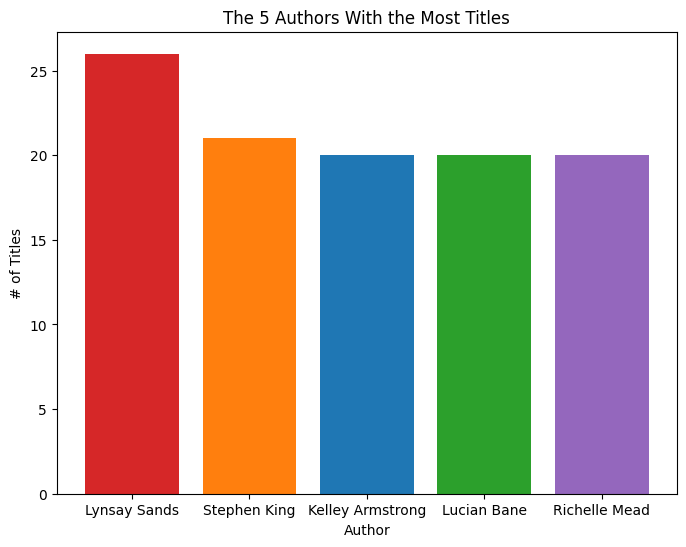

In [29]:
plt.figure(figsize=(8, 6))
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:purple']
plt.bar(top_authors.index, top_authors.values, color=colors)
plt.title('The 5 Authors With the Most Titles')
plt.xlabel('Author')
plt.ylabel('# of Titles')
plt.show()

## Use .groupby(), .agg(), and sort_values() functions to identify the top five book genres based on their average rating and total number of reviews, but only considering genres that have at least 100 reviews.

In [30]:
top_genres = alt_book_data.groupby('genre').agg({'rating': 'mean', 'review_count': 'sum'})
top_genres = top_genres[top_genres['review_count'] >= 100]
top_genres = top_genres.sort_values(by=['rating', 'review_count'], ascending=False).head(5)

print(top_genres)

               rating  review_count
genre                              
Urban        4.509000          1358
Classics     4.340000           158
Polyamorous  4.326667          2639
Language     4.245000           235
Amish        4.238333          1816


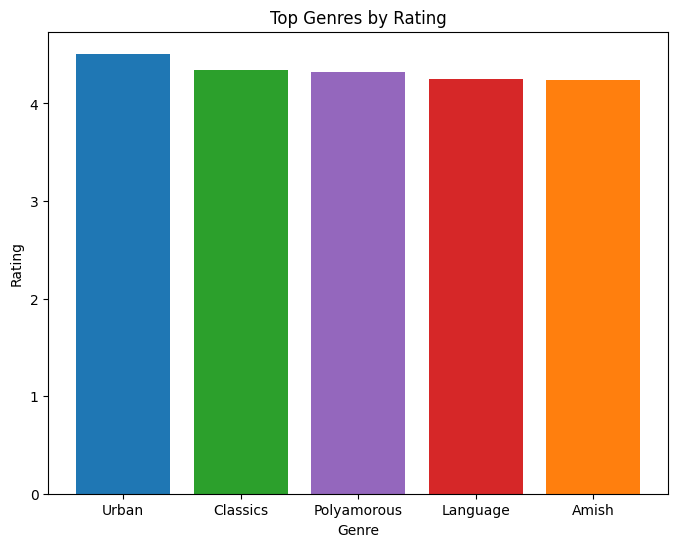

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['tab:blue', 'tab:green', 'tab:purple', 'tab:red', 'tab:orange']
ax.bar(top_genres.index, top_genres['rating'], color=colors)
ax.set_title('Top Genres by Rating')
ax.set_xlabel('Genre')
ax.set_ylabel('Rating')
plt.show()

# Interpret Data

* The average rating between all titles is 3.96 out of 5. I found this to be higher than I expected.
* There is a total of 2882223 pages combined between all of the titles. 
* The title with the highest number of pages was Harry Potter Boxset (Books #1-7). Not surprising as there are 7 very large titles rolled into 1 title.
* The author with the most titles was Lynsay Sands with 26. This wassurprising because I expected someone like Stephen King.
* Finally the top genre based on ratings was the Urban genre. I expected it to be Science Fiction or Classics but, alas, that was not the case.